In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from partA import *
from skimage import img_as_float
import photomosaic as pm

with open('./manmade_training.txt') as manmade_training:
    dir_manmade = manmade_training.read().splitlines()
with open('./natural_training.txt') as natural_training:
    dir_natural = natural_training.read().splitlines()
with open('./resize_image.txt') as resize_image:
    dir_resize = resize_image.read().splitlines()



(960, 1280, 3)

## Basic Example

In [2]:
image = pm.imread('./'+dir_manmade[39])
pool = pm.make_pool('./resize_image/*.jpg')
mosaic = pm.basic_mosaic(image,pool,(50,50),depth=1)


drawing mosaic: 100%|██████████| 2500/2500 [00:02<00:00, 1074.10it/s]


In [1]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(mosaic)
plt.subplot(1,2,2)
plt.imshow(image)
plt.show()

NameError: name 'plt' is not defined

## Detailed Example


In [4]:
image = pm.imread('./'+dir_manmade[39])
pool = pm.make_pool('./resize_image/*.jpg')
image = img_as_float(image)
converted_img = pm.perceptual(image) # change color space
scaled_img = pm.rescale_commensurate(converted_img, grid_dims=(50, 50), depth=1)
tiles = pm.partition(scaled_img, grid_dims=(50, 50), depth=1)
# Reshape the 3D array (height, width, color_channels) into
# a 2D array (num_pixels, color_channels) and average over the pixels.
tile_colors = [np.mean(scaled_img[tile].reshape(-1, 3), 0) for tile in tiles]
# Match a pool image to each tile.
match = pm.simple_matcher(pool) # kd tree
matches = [match(tc) for tc in tile_colors]
canvas = np.ones_like(scaled_img)  # white canvas
mos = pm.draw_mosaic(canvas, tiles, matches)


drawing mosaic: 100%|██████████| 2734/2734 [00:02<00:00, 1187.21it/s]


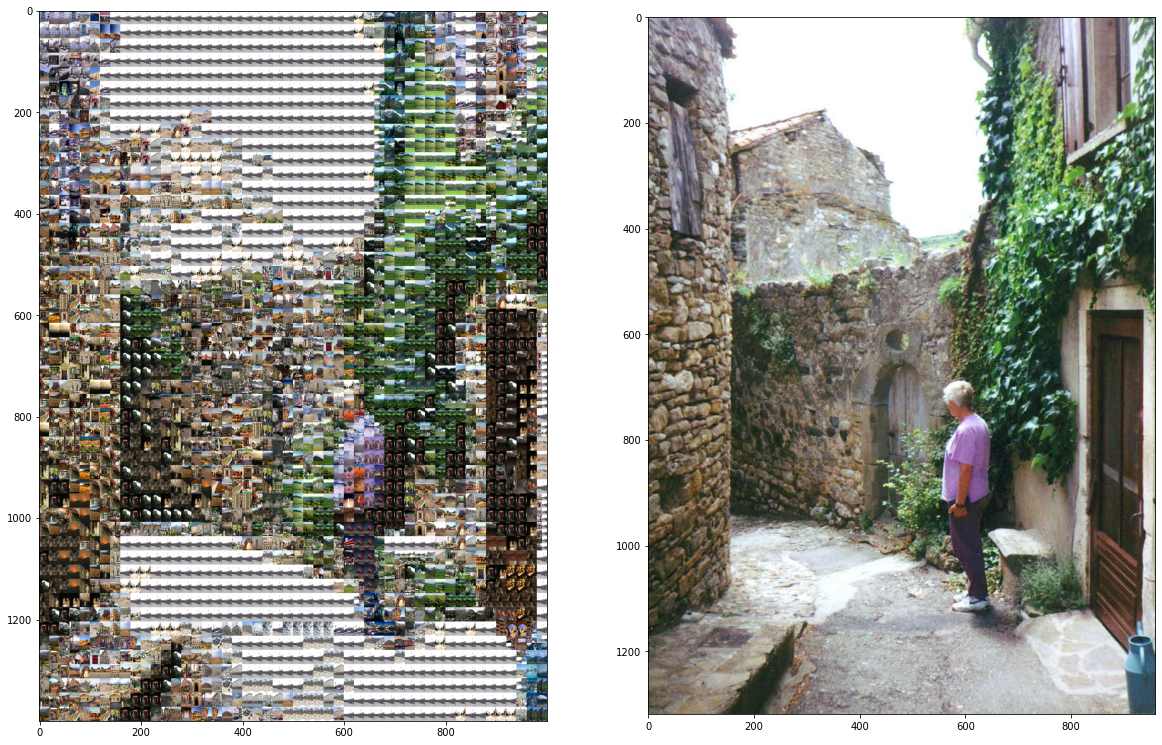

In [5]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(canvas)
plt.subplot(1,2,2)
plt.imshow(image)
plt.show()